In [140]:
import pandas as pd

%matplotlib inline

In [142]:
# Read the workshop data
workshops_file = "../data/workshops.csv"
workshops_df = pd.read_csv(workshops_file, encoding="utf-8")

In [143]:
# Let's ispect data a bit
workshops_df.head(10)

,country_name,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Antarctica,0,0,0,0,0,0,1,0,0,0
1,Argentina,0,0,0,0,0,0,2,1,0,0
2,Australia,0,6,10,34,43,45,29,36,33,20
3,Austria,0,0,0,0,0,0,0,1,1,0
4,Bangladesh,0,0,0,0,0,0,0,0,1,6
5,Belgium,0,0,0,1,0,1,2,3,0,0
6,Botswana,0,0,0,0,0,1,0,1,0,0
7,Brazil,0,0,6,5,5,0,2,0,1,1
8,Canada,8,11,26,25,43,29,23,19,20,9
9,China,0,1,0,0,0,0,0,0,0,0


In [144]:
# Use countries column as index
workshops_df.index = workshops_df['country_name']
workshops_df.drop(columns = ['country_name'], inplace = True)
workshops_df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country_name,,,,,,,,,,
Antarctica,0,0,0,0,0,0,1,0,0,0
Argentina,0,0,0,0,0,0,2,1,0,0
Australia,0,6,10,34,43,45,29,36,33,20
Austria,0,0,0,0,0,0,0,1,1,0
Bangladesh,0,0,0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...
Thailand,0,0,0,1,0,1,0,0,0,0
United Kingdom,7,14,21,26,36,47,52,64,53,44
United States,20,49,66,142,167,186,223,287,239,158


In [145]:
# Add column with sums of workshops per country across all years (i.e. total workshops per country)
workshops_df['total'] = workshops_df.sum(axis=1)
workshops_df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,total
country_name,,,,,,,,,,,
Antarctica,0,0,0,0,0,0,1,0,0,0,1
Argentina,0,0,0,0,0,0,2,1,0,0,3
Australia,0,6,10,34,43,45,29,36,33,20,256
Austria,0,0,0,0,0,0,0,1,1,0,2
Bangladesh,0,0,0,0,0,0,0,0,1,6,7
...,...,...,...,...,...,...,...,...,...,...,...
Thailand,0,0,0,1,0,1,0,0,0,0,2
United Kingdom,7,14,21,26,36,47,52,64,53,44,364
United States,20,49,66,142,167,186,223,287,239,158,1537


In [146]:
# Number of workshops for all countries per year
workshops_per_year = workshops_df.drop(columns = ['total']).sum()
workshops_per_year

2012     38
2013     93
2014    144
2015    277
2016    358
2017    373
2018    437
2019    556
2020    454
2021    337
dtype: int64

<AxesSubplot:title={'center':'Workshops per year'}>

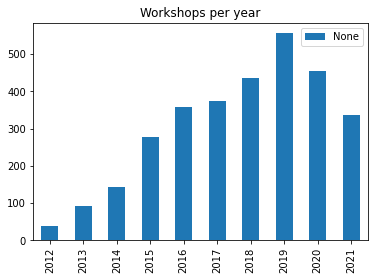

In [147]:
workshops_per_year.plot(kind='bar', legend=True, title ="Workshops per year")

country_name
United States     1537
United Kingdom     364
Australia          256
Canada             213
Germany            107
New Zealand         89
Norway              78
South Africa        63
Netherlands         52
Ethiopia            32
Switzerland         23
Saudi Arabia        21
Brazil              20
Sweden              18
Italy               16
Mexico              15
Denmark             13
France              12
Spain               12
Poland              10
Name: total, dtype: int64


<AxesSubplot:title={'center':'Top 20 countries based on number of workshops run'}, xlabel='country_name'>

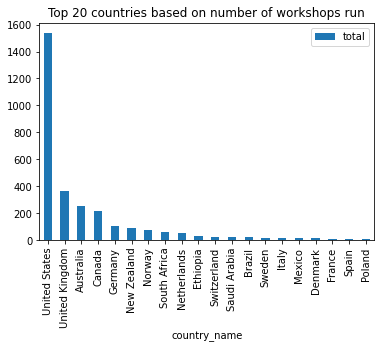

In [148]:
# Number of workshops for a countries across years
workshops_per_country = workshops_df['total'].sort_values(ascending = False)
#print(workshops_per_country)
# Top 20 countries based on workshop numbers 
top_20 = workshops_per_country.head(20)
print(top_20)
top_20.plot(kind='bar', legend=True, title ="Top 20 countries based on number of workshops run")

2012     6
2013    14
2014    17
2015    24
2016    25
2017    24
2018    33
2019    38
2020    28
2021    27
dtype: int64


<AxesSubplot:title={'center':'Different countries running workshops each year'}>

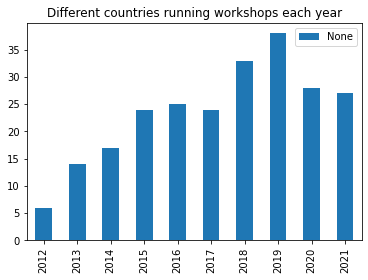

In [149]:
# For each year, how many different countries ran workshops?
different_countries_with_workshops_per_year = workshops_df.drop(columns = ['total']).fillna(0).astype(bool).sum()
print(different_countries_with_workshops_per_year)
different_countries_with_workshops_per_year.plot(kind='bar', legend=True, title ="Different countries running workshops each year")

                                   2012  2013  2014   2015   2016   2017  \
country_name                                                               
Antarctica                          NaN   NaN   NaN    NaN    NaN    NaN   
Argentina                           NaN   NaN   NaN    NaN    NaN    NaN   
Australia                           NaN   6.0  10.0   34.0   43.0   45.0   
Austria                             NaN   NaN   NaN    NaN    NaN    NaN   
Bangladesh                          NaN   NaN   NaN    NaN    NaN    NaN   
...                                 ...   ...   ...    ...    ...    ...   
Thailand                            NaN   NaN   NaN    1.0    NaN    1.0   
United Kingdom                      7.0  14.0  21.0   26.0   36.0   47.0   
United States                      20.0  49.0  66.0  142.0  167.0  186.0   
Venezuela, Bolivarian Republic of   NaN   NaN   NaN    1.0    NaN    NaN   
Zimbabwe                            NaN   NaN   NaN    NaN    NaN    NaN   

           

<AxesSubplot:title={'center':'How many different countries ran a workshop for the first time in a given year'}>

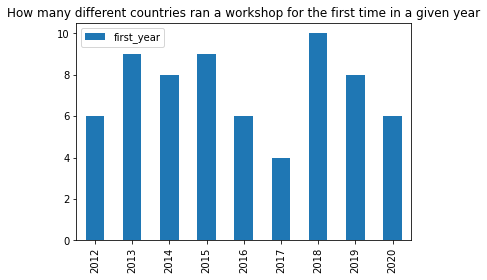

In [150]:
# For each year, how many different countries ran workshops for the first time in that year?
d = workshops_df.mask(workshops_df == 0)
print(d)
workshops_df = workshops_df.assign(
    first_year=d.apply(pd.Series.first_valid_index, axis = 1)
)
print(workshops_df)
# How many different countries ran a workshop for the first time in a given year
first_year = workshops_df['first_year'].value_counts().sort_index()
print(first_year)
first_year.plot(kind='bar', legend=True, title ="How many different countries ran a workshop for the first time in a given year")